In [4]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

from models import bMFThreshold, bMFPenalty
import pandas as pd
from generators import ArbiBooleanMatrix, DiagBooleanMatrix, SynthBooleanMatrix
from utils import show_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[I] m            : 1000
[I] n            : 500
[I] k            : 5
[I] overlap_flag : False
[I] size_range   : [0.25 0.75 0.25 1.  ]
[I] seed         : 1234
[I] noise        : [0.4  0.02]
[I] seed         : 1024
[I] Using RandomState.


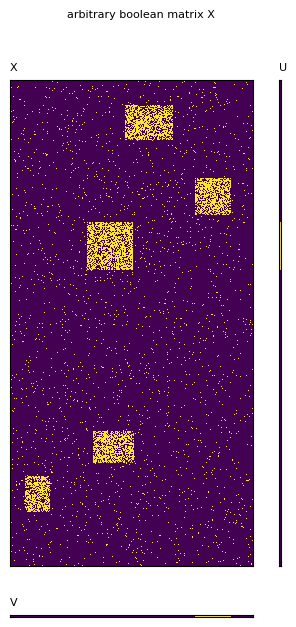

In [8]:
# generate arbitrary Boolean matrix (X)

from generators import DiagBooleanMatrix, ArbiBooleanMatrix

n_row=1000
n_col=500
k=5
overlap_flag=True
noise=[0.4, 0.02]
size_range=[0.25, 0.75, 0.25, 1.0]

X = ArbiBooleanMatrix(m=n_row, n=n_col, k=k, overlap_flag=False, size_range=size_range)
X.generate(seed=1234) # if no seed assigned, use time instead
X.add_noise(noise=noise, seed=1024)
X.show_matrix(scaling=0.2, title='arbitrary boolean matrix X')

In [9]:
from datasets import NoSplit

X_split = NoSplit(X=X.X)

X_train, X_val, X_test = X_split.X_train, X_split.X_val, X_split.X_test

[I] k            : 5
[I] algorithm    : threshold
[I] initial u, v : [0.2, 0.2]
[I] lamda        : 5
[I] eps          : 1e-06
[I] max_iter     : 100
[I] display      : True
[I]   scaling    : 0.2
[W] Missing validation data.
[I] k            : 5
[I] seed         : 1702415334
[I] init         : random
[I] max_iter     : 2000
[W] Missing validation data.
[I] After initialization: max U: 1.969, max V: 0.945


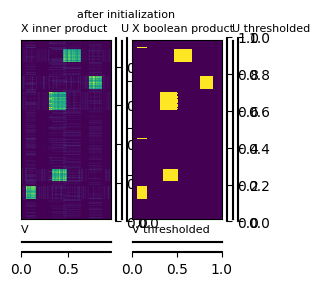

[I] After normalization: max U: 0.975, max V: 0.975


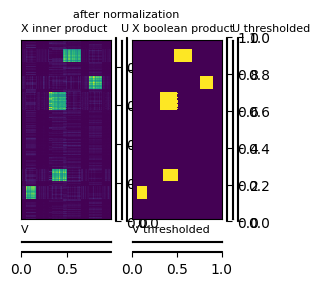

d:\Dropbox\PyBMF\examples\..\utils\common.py:68: RuntimeWarning: overflow encountered in exp
  X = 1 / (1 + np.exp(-lamda * X))
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


[W] Search direction is not a descent direction.


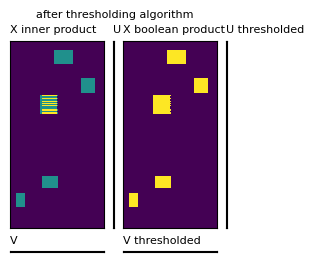

In [46]:
eps=1e-06
lamda=5
max_iter=100
u, v = 0.2, 0.2

bmf = bMFThreshold(k=k, eps=eps, lamda=lamda, max_iter=max_iter, u=u, v=v)
bmf.fit(X_train, display=True, scaling=0.2)

In [37]:
bmf.V.shape

(5, 500)

Text(0.5, 0, 'z')

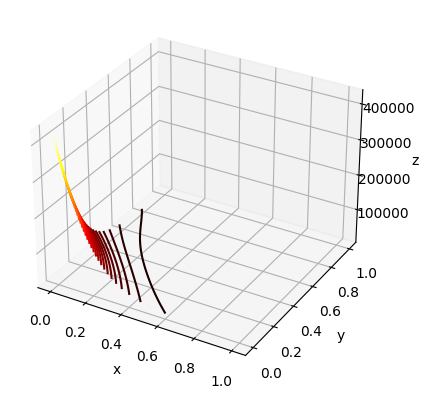

In [39]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# def f(x, y):
#     return np.sin(np.sqrt(x ** 2 + y ** 2))
N = 100
x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)
Z = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in range(N):
    for j in range(N):
        Z[i, j] = bmf.F([X[i, j], Y[i, j]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Text(0.5, 0, 'z')

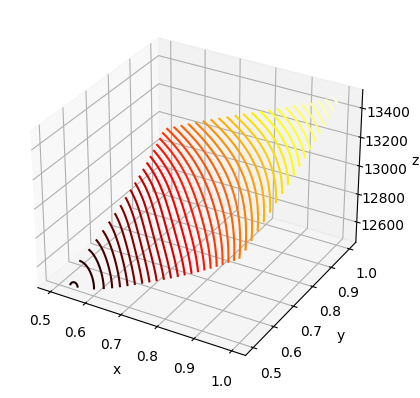

In [40]:
N = 100
x = np.linspace(0.5, 1, N)
y = np.linspace(0.5, 1, N)
Z = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in range(N):
    for j in range(N):
        Z[i, j] = bmf.F([X[i, j], Y[i, j]])
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='hot')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

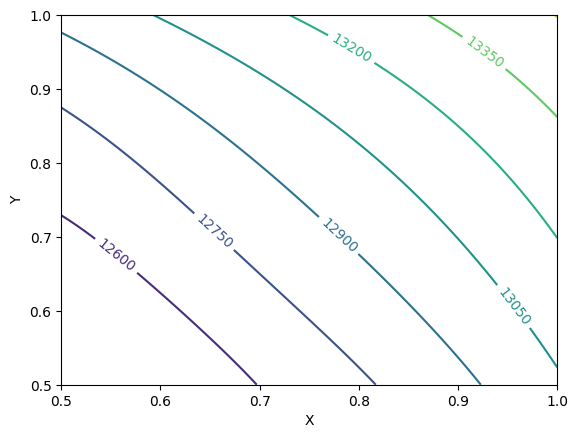

In [41]:
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [42]:
N = 100
x = np.linspace(0.3, 1.2, N)
y = np.linspace(0.3, 1.2, N)
dx = np.zeros([N, N])
dy = np.zeros([N, N])
X, Y = np.meshgrid(x, y)
for i in range(N):
    for j in range(N):
        dx[i, j], dy[i, j] = bmf.dF([X[i, j], Y[i, j]])
        # k = 5 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
        # dx[i, j] *= k
        # dy[i, j] *= k


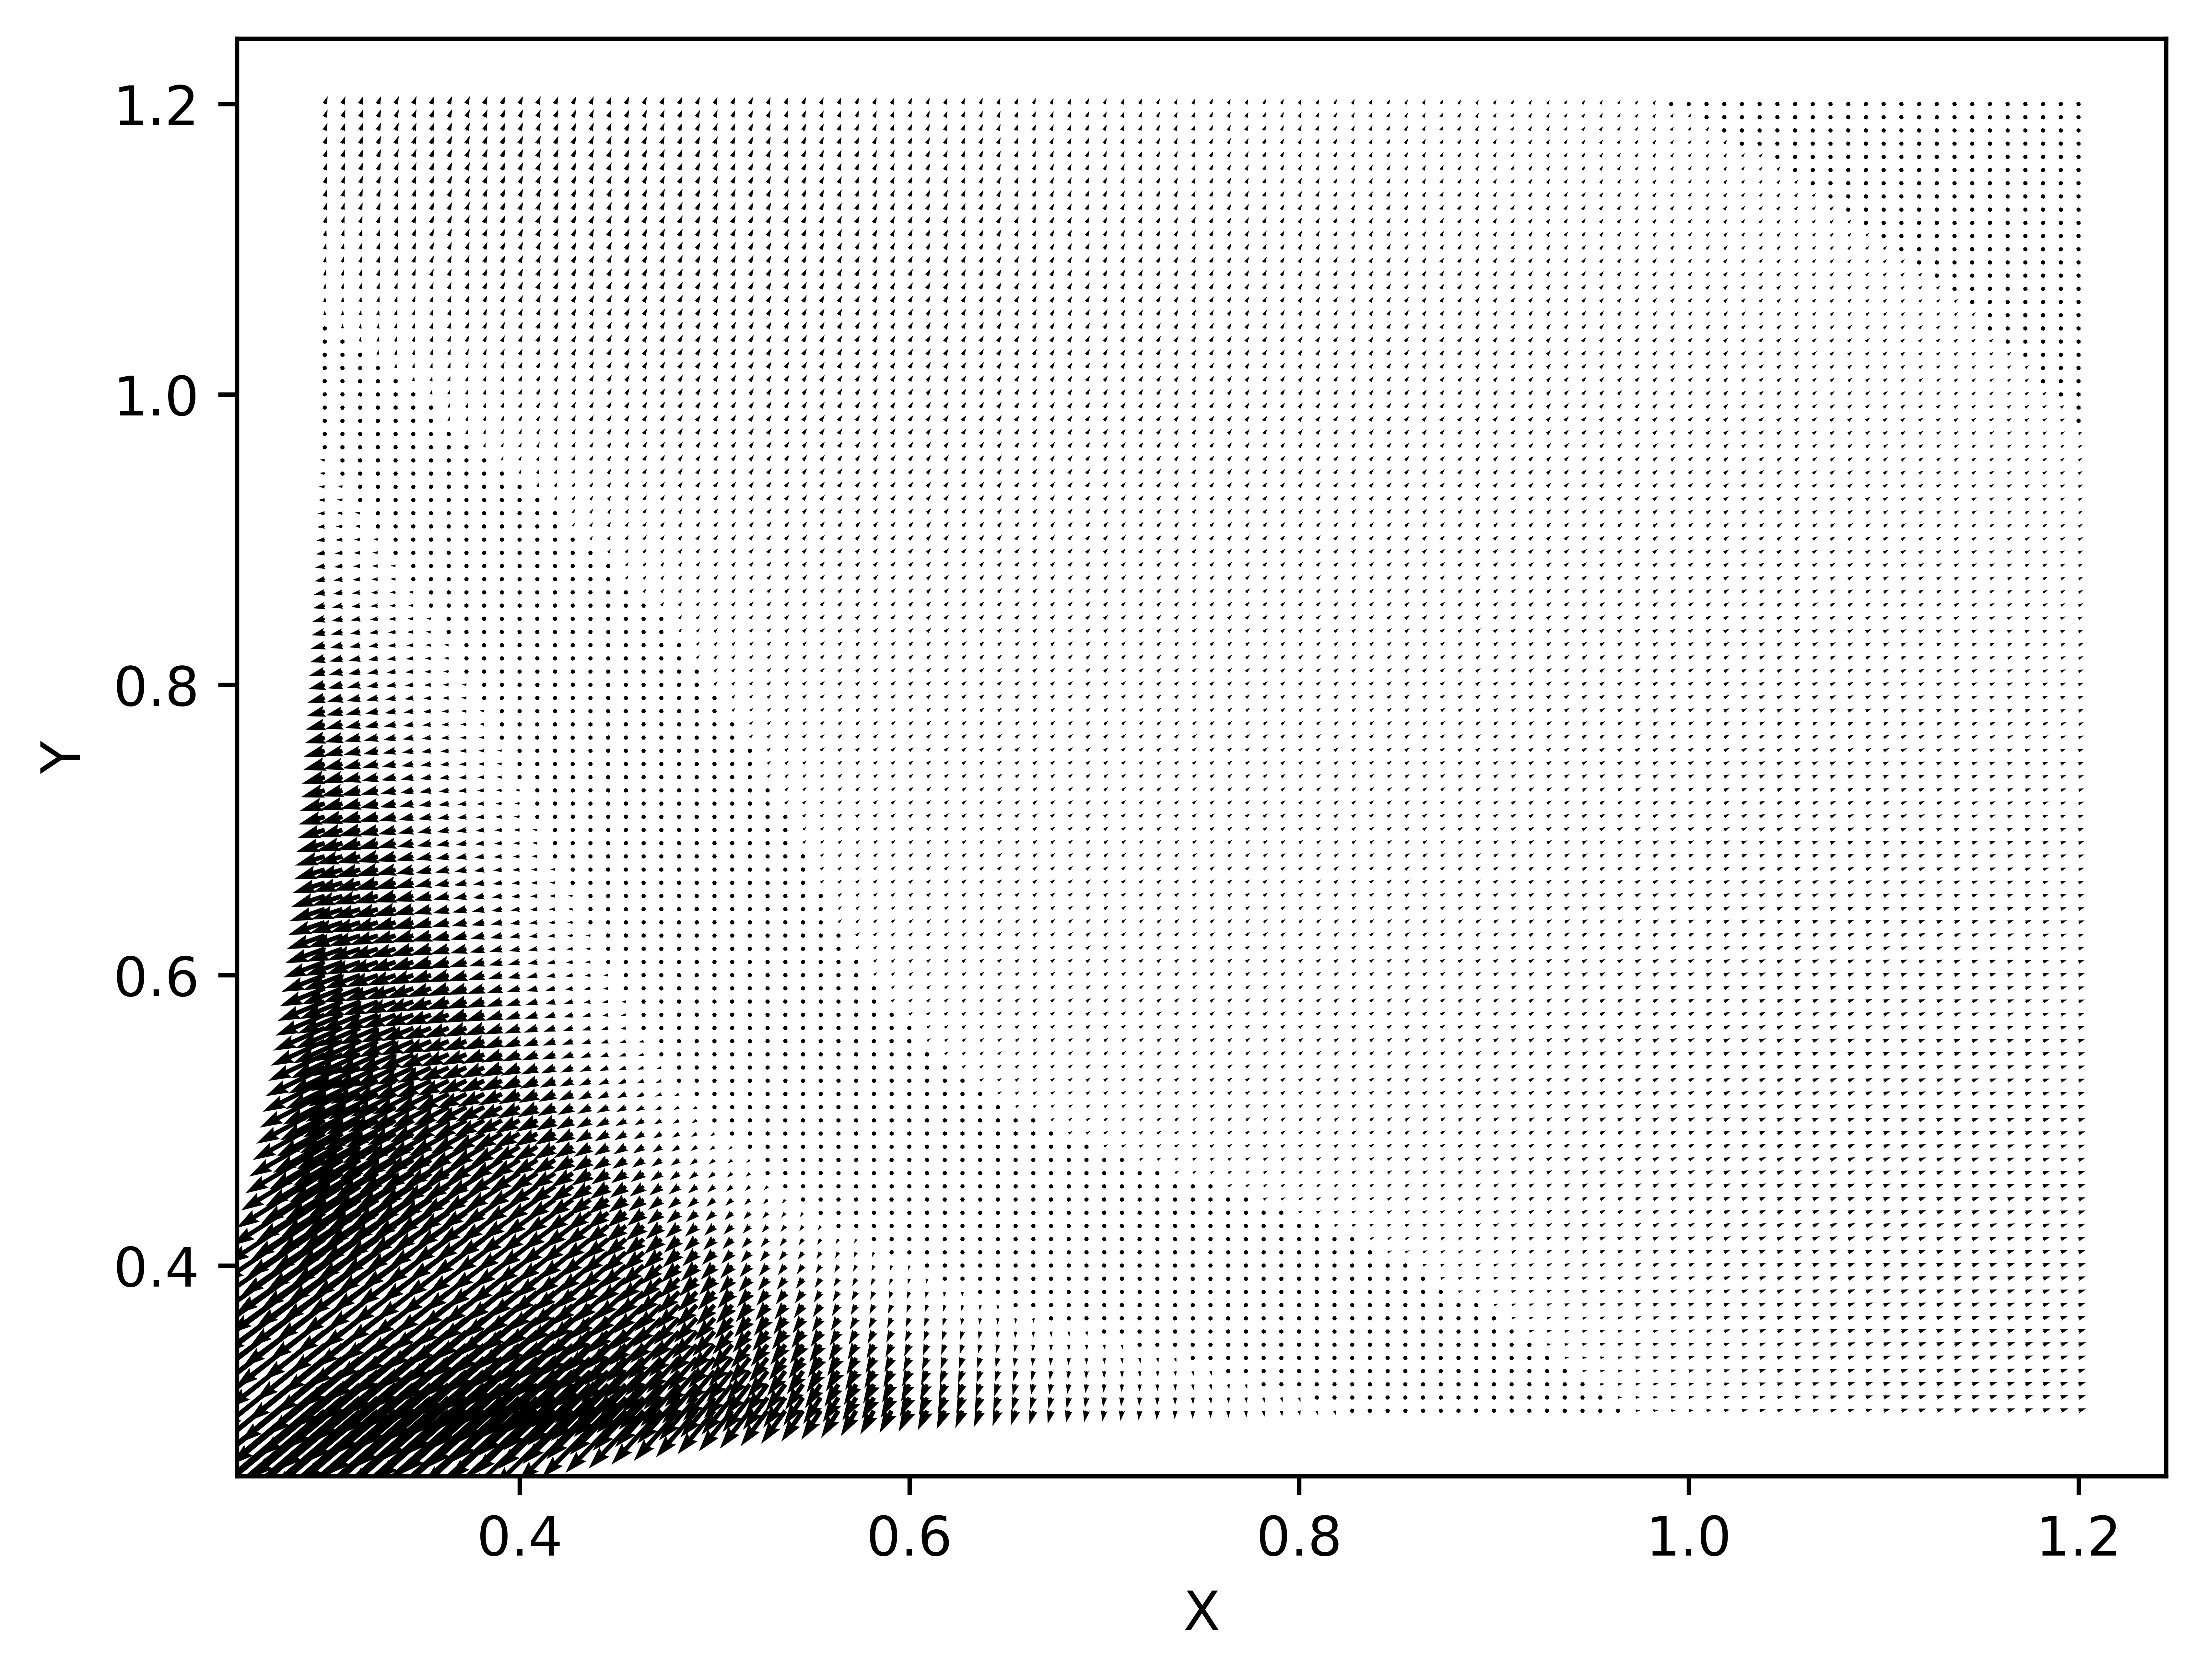

In [43]:
plt.figure(dpi=1200) 
fig = plt.quiver(X, Y, dx, dy)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
# archive

[I] seed         : 1024
[I] algorithm    : penalty
[I] reg          : 10
[I] reg_growth   : 1.01
[I] eps          : 0.01
[I] max_iter     : 100
[I] seed         : 1694504654
[I] init         : random
[I] max_iter     : 2000
[D] max U: 1.532183296607045 max V: 1.3516912817560722


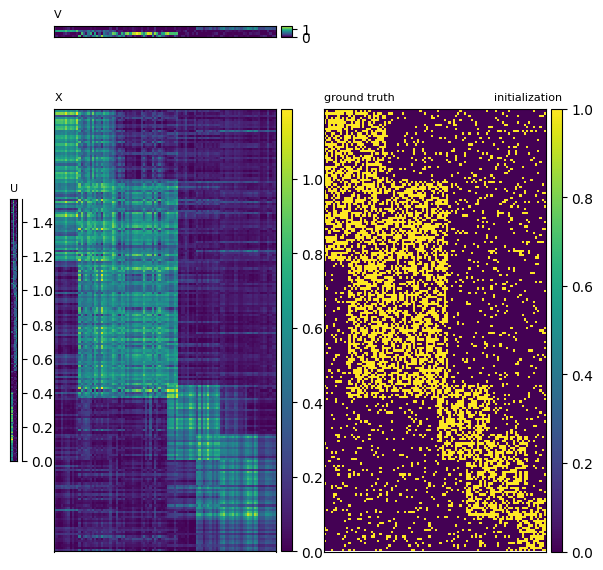

[D] max U: 1.0730732761406985 max V: 1.0730732761406985


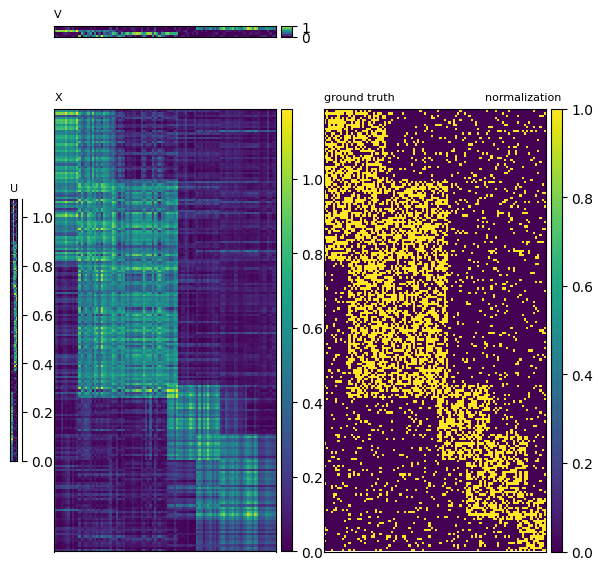

[I] rec_error: 2807.628944737402, reg_error: 28.870280826738274
[I] n_iter: 0, reg: 10, error: 28.870280826738274
[I] rec_error: 2811.4922404878216, reg_error: 26.799885284016355
[I] n_iter: 1, reg: 10.1, error: 26.799885284016355
[I] rec_error: 2816.7689254326333, reg_error: 25.523847770200287
[I] n_iter: 2, reg: 10.201, error: 25.523847770200287
[I] rec_error: 2821.095002012865, reg_error: 24.658508258792452
[I] n_iter: 3, reg: 10.30301, error: 24.658508258792452
[I] rec_error: 2824.466686363996, reg_error: 24.02228482594345
[I] n_iter: 4, reg: 10.4060401, error: 24.02228482594345
[I] rec_error: 2827.1409244806423, reg_error: 23.522819122023577
[I] n_iter: 5, reg: 10.510100501, error: 23.522819122023577
[I] rec_error: 2829.330033194596, reg_error: 23.10980734476417
[I] n_iter: 6, reg: 10.615201506010001, error: 23.10980734476417
[I] rec_error: 2831.1817474875193, reg_error: 22.754120649557514
[I] n_iter: 7, reg: 10.721353521070101, error: 22.754120649557514
[I] rec_error: 2832.796891

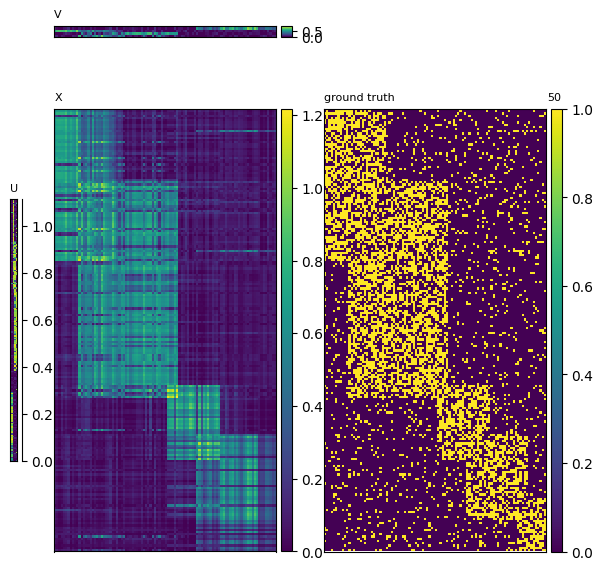

[I] rec_error: 2883.8506844868975, reg_error: 14.478307073565851
[I] n_iter: 50, reg: 16.44631821843883, error: 14.478307073565851
[I] rec_error: 2885.108214449357, reg_error: 14.344409602910602
[I] n_iter: 51, reg: 16.610781400623218, error: 14.344409602910602
[I] rec_error: 2886.3692090431077, reg_error: 14.212732349159406
[I] n_iter: 52, reg: 16.77688921462945, error: 14.212732349159406
[I] rec_error: 2887.633020555613, reg_error: 14.083688023187364
[I] n_iter: 53, reg: 16.944658106775744, error: 14.083688023187364
[I] rec_error: 2888.8980776423828, reg_error: 13.957726034262155
[I] n_iter: 54, reg: 17.1141046878435, error: 13.957726034262155
[I] rec_error: 2890.162327596863, reg_error: 13.835190001604099
[I] n_iter: 55, reg: 17.285245734721936, error: 13.835190001604099
[I] rec_error: 2891.423780782723, reg_error: 13.716238660316668
[I] n_iter: 56, reg: 17.458098192069155, error: 13.716238660316668
[I] rec_error: 2892.6808901228615, reg_error: 13.600854987796275
[I] n_iter: 57, reg

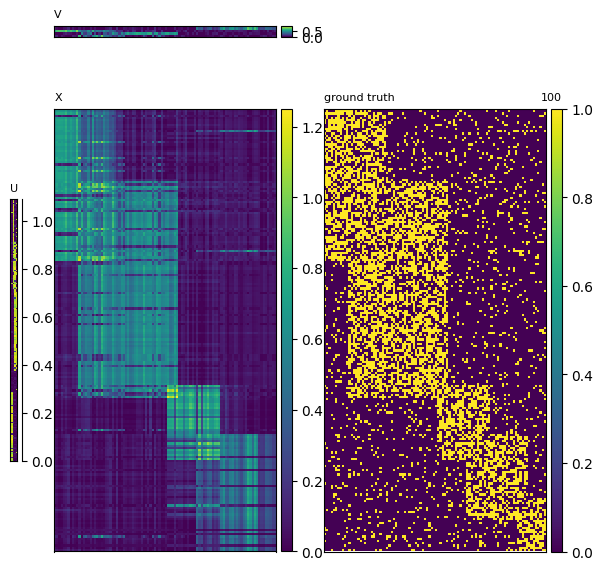

[I] rec_error: 2945.7029276394433, reg_error: 10.300490750314378
[I] n_iter: 100, reg: 27.048138294215285, error: 10.300490750314378


In [30]:
bmf = binaryMF(X=m.X, k=k, X_missing=None, algorithm='penalty', reg=10, reg_growth=1.01, display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx, seed=1024, max_iter=100)
bmf.solve()

In [31]:
import numpy as np
numerator = np.matmul(bmf.X, bmf.V.T) + 3 * bmf.reg * np.power(bmf.U, 2)
numerator

array([[  5.38740254,   2.40867746,  94.94258529,   5.71073374,
          3.67374867],
       [  4.06349514,   1.48365843,  83.517755  ,   2.96409036,
          2.46181231],
       [  2.67150602,   1.7645404 , 108.17409265,   4.46409522,
          5.49460985],
       [  3.30871812,   2.66178064,   5.33165618,   3.31218547,
         83.52507532],
       [  1.04744446,   0.84205808,  84.59743126,   5.48469818,
          2.39358594],
       [  3.48335637,   1.3231469 , 102.22465373,   3.11653129,
          5.01018744],
       [  3.08346347,   2.07325279,  95.83860357,   2.21788799,
          2.82547453],
       [  5.48701488,   2.34266917,  90.54797071,   4.51841752,
          4.12679661],
       [  3.2298358 ,   2.26803484,  98.75718703,   4.51019901,
          4.14934737],
       [  2.4857081 ,   0.75959228,  95.39114588,   2.29020632,
          2.3554312 ],
       [  1.97029972,  79.92845162,  83.88939229,   3.2311711 ,
          4.96754331],
       [  5.44013605,   1.98587542,  82.731

In [32]:
denominator = np.matmul(bmf.U, np.matmul(bmf.V, bmf.V.T)) + 2 * bmf.reg * np.power(bmf.U, 3) + bmf.reg * bmf.U
denominator

array([[  5.41804548,   2.42542773,  94.95513658,   5.7570269 ,
          3.6893621 ],
       [  4.09008781,   1.49265802,  83.49436893,   2.99513224,
          2.84507696],
       [  2.68048676,   1.77455785, 108.22790678,   4.4975345 ,
          5.54043554],
       [  3.32498364,   2.68463856,   5.3701303 ,   3.31633133,
         83.5064199 ],
       [  1.61053244,   1.09272592,  84.57581226,   5.53904238,
          2.94567876],
       [  3.50826355,   1.24577419, 102.26250806,   2.62225504,
          5.05650386],
       [  3.1014368 ,   2.08905859,  95.85988244,   2.43682185,
          2.98069385],
       [  5.52112313,   2.35788088,  90.54826207,   4.5473143 ,
          4.1584734 ],
       [  3.24825169,   2.28464808,  98.78455169,   4.53576631,
          4.19007911],
       [  2.50050885,   1.12237858,  95.41155158,   2.36763903,
          2.94775762],
       [  3.64473404,  79.87303092,  83.86432916,   3.1589707 ,
          5.01700757],
       [  5.47731729,   1.99813539,  82.703

[I] seed         : 1000
[I] algorithm    : threshold
[I] lamda        : 5
[I] eps          : 0.01
[I] max_iter     : 100
[I] seed         : 1694505053
[I] init         : random
[I] max_iter     : 2000
[D] max U: 1.4028953380458125 max V: 1.42837494762883


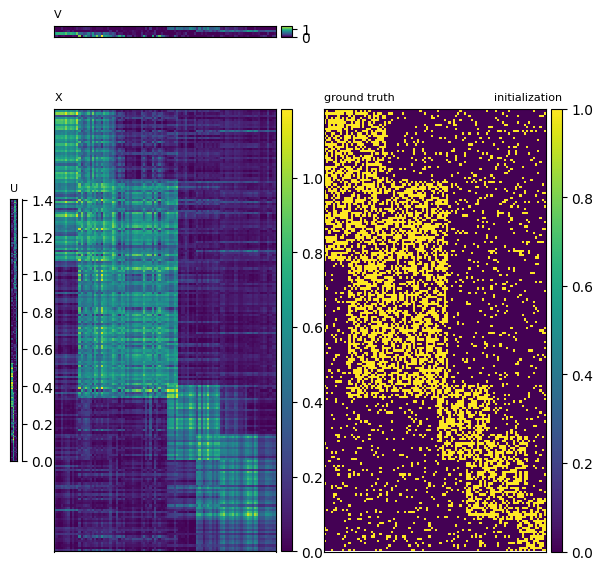

[D] max U: 1.0728871100876722 max V: 1.0728871100876718


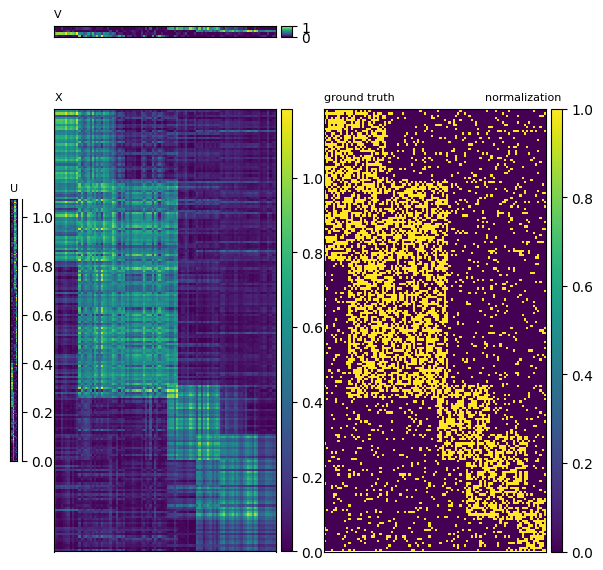

[I] Wolfe line search for iter   :  1
    num of function evals made   :  10
    num of gradient evals made   :  1
    function value update        :  1603.9677017799863  ->  1572.0669602827206
    threshold update             :  [0.8 0.2]  ->  [0.74351371 0.44564716]
    threshold difference         :  [-0.05648629  0.24564716]  ( 0.0635332293065232 )
[I] Wolfe line search for iter   :  2
    num of function evals made   :  12
    num of gradient evals made   :  1
    function value update        :  1572.0669602827206  ->  1509.7232576544186
    threshold update             :  [0.74351371 0.44564716]  ->  [0.62587162 0.38496202]
    threshold difference         :  [-0.11764209 -0.06068514]  ( 0.01752234669970122 )
[I] Wolfe line search for iter   :  3
    num of function evals made   :  12
    num of gradient evals made   :  1
    function value update        :  1509.7232576544186  ->  1484.3861840198324
    threshold update             :  [0.62587162 0.38496202]  ->  [0.66158162 0.42

d:\Dropbox\PyBMF\models\binaryMF.py:273: RuntimeWarning: overflow encountered in exp
  X = 1 / (1 + np.exp(-self.lamda * X))
c:\Users\nieht\Anaconda3\envs\cornac\lib\site-packages\scipy\optimize\_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [36]:
bmf2 = binaryMF(X=m.X, k=k, X_missing=None, algorithm='threshold', eps = 1e-06, lamda=5, display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx, seed=1000, max_iter=100)
bmf2.solve()

In [ ]:
import numpy as np
x0 = np.array([0.5, 0.5]) # initial params
p0 = bmf2.dF(x0) # initial gradient
p0

array([-10.78249637, -20.25900074])

# Threshold

In [ ]:
bmf2 = binaryMF(X=m.X, k=k, X_missing=None, algorithm='threshold', eps = 0.01, lamda=100, display_flag=True, U_idx=m.U_idx, V_idx=m.V_idx, seed=1000, max_iter=1)
# bmf2.initialize()
# bmf2.normalize()
bmf2.solve()

TypeError: 'numpy.float64' object cannot be interpreted as an integer